<a href="https://colab.research.google.com/github/kirilft/Insy-stuff/blob/main/notebooks/1-explore-hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your name:

-   **Name**:

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then create a PDF from it. Submit the PDF on
Gradescope.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask questions on Ed if you need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

<ipython-input-4-d2570c292f4d>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [5]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

In [6]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [7]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_phar

Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [21]:
# TODO Q5
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New Jersey")) & (df['sub_region_2'].isnull())]

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [26]:
# TODO Q6
# Check for missing data in the ...percent_change_from_baseline fields
df_subset.isnull().sum()

# 2) Check the date range and look for missing days
min_date = df_subset['date'].min()
max_date = df_subset['date'].max()

print("Date range:", min_date, "to", max_date)

# Number of unique days in the subset
actual_days = df_subset['date'].nunique()

# Count how many days should exist between min_date and max_date
# (including both start and end dates)
expected_days = (max_date - min_date).days + 1

print("Actual number of days:", actual_days)
print("Expected number of days:", expected_days)

if actual_days == expected_days:
    print("No missing dates in this range.")
else:
    print("There are some missing dates in this range.")

Date range: 2020-02-15 00:00:00 to 2022-10-15 00:00:00
Actual number of days: 974
Expected number of days: 974
No missing dates in this range.


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
...percent_change_from_baseline fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**

---

For the U.S. state chosen (New Jersey), the data appears complete. However, in other regions some data may be missing for certain dates or fields. This can happen when there are not enough data points to meet Google’s privacy thresholds or when data collection is limited in certain locations.

- All data is aggregated and anonymized. We include data only from users who have opted in to Location History, so coverage could vary by region.

(Google COVID-19 Community Mobility Reports, https://www.google.com/covid19/mobility/)

To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [27]:
import pandas as pd

# Read in the vaccination data
url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
df_vax = pd.read_csv(url_vax)

# Convert the 'date' column to datetime format
df_vax['date'] = pd.to_datetime(df_vax['date'])

# Filter the data to include only rows for New Jersey
df_vax_subset = df_vax[df_vax['location'] == "New Jersey"]

# Check the structure of the dataframe and preview the first few rows
print(df_vax_subset.info())
print(df_vax_subset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 849 entries, 31682 to 32530
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 849 non-null    datetime64[ns]
 1   location                             849 non-null    object        
 2   total_vaccinations                   515 non-null    float64       
 3   total_distributed                    515 non-null    float64       
 4   people_vaccinated                    515 non-null    float64       
 5   people_fully_vaccinated_per_hundred  514 non-null    float64       
 6   total_vaccinations_per_hundred       515 non-null    float64       
 7   people_fully_vaccinated              514 non-null    float64       
 8   people_vaccinated_per_hundred        515 non-null    float64       
 9   distributed_per_hundred              515 non-null    float64       
 10  daily_vaccina

In [28]:
# TODO Q8 - Cases option

# Read in the cases data
url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)

# Convert the 'date' column to datetime format
df_cases['date'] = pd.to_datetime(df_cases['date'])

# Filter for the U.S. state of interest (New Jersey)
df_cases_subset = df_cases[df_cases['state'] == "New Jersey"]

# Check the dataframe structure and preview the first few rows
print(df_cases_subset.info())
print(df_cases_subset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 292 to 61918
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1115 non-null   datetime64[ns]
 1   state   1115 non-null   object        
 2   fips    1115 non-null   int64         
 3   cases   1115 non-null   int64         
 4   deaths  1115 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 52.3+ KB
None
          date       state  fips  cases  deaths
292 2020-03-04  New Jersey    34      1       0
312 2020-03-05  New Jersey    34      2       0
337 2020-03-06  New Jersey    34      4       0
368 2020-03-07  New Jersey    34      4       0
403 2020-03-08  New Jersey    34      6       0


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

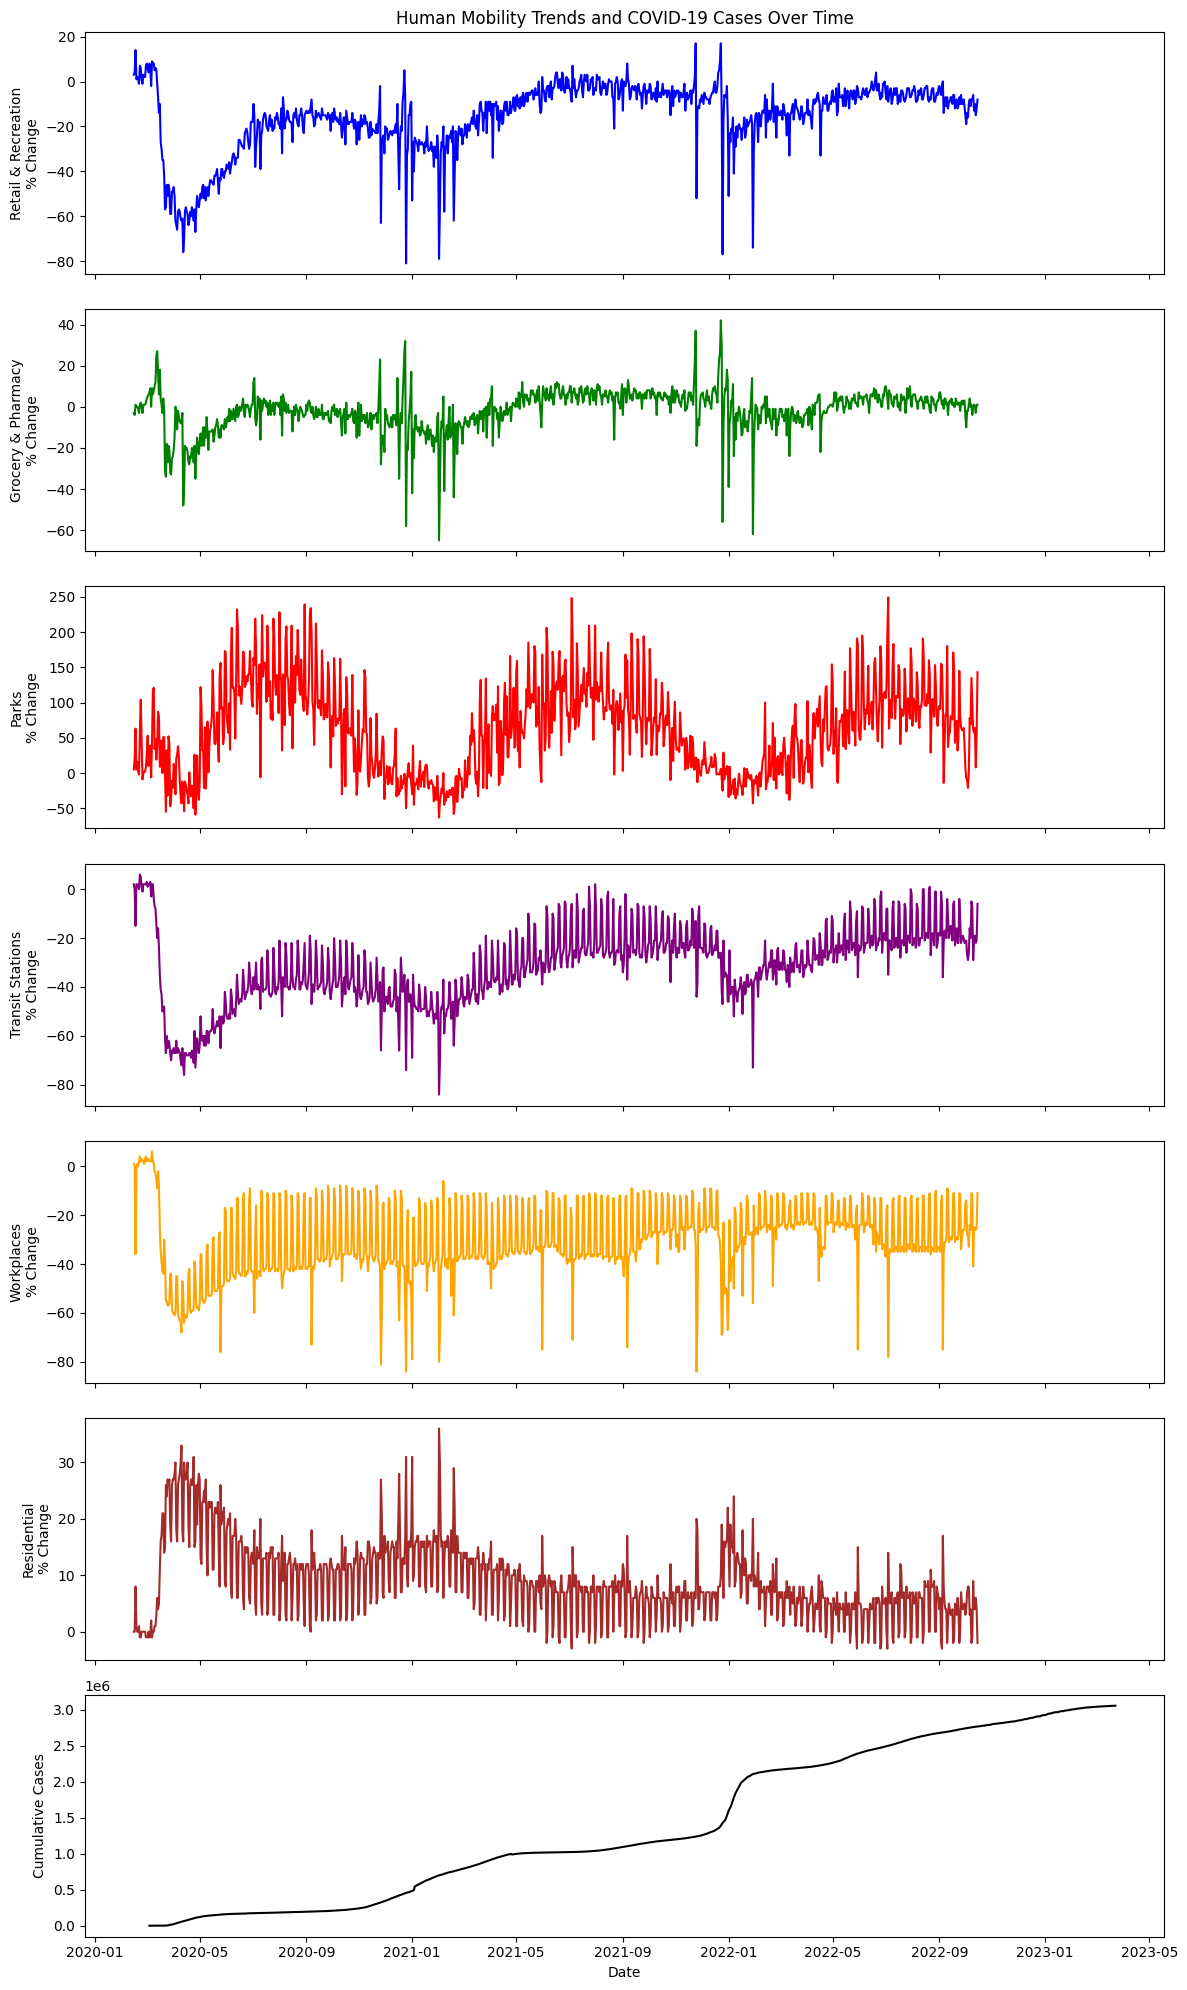

In [29]:
# TODO Q9
import matplotlib.pyplot as plt

# Create a figure with 7 vertical subplots (sharing the x-axis for dates)
fig, axes = plt.subplots(7, 1, figsize=(12, 20), sharex=True)

# Top subplot: retail_and_recreation_percent_change_from_baseline
axes[0].plot(df_subset['date'], df_subset['retail_and_recreation_percent_change_from_baseline'], color='blue')
axes[0].set_ylabel('Retail & Recreation\n% Change')
axes[0].set_title('Human Mobility Trends and COVID-19 Cases Over Time')

# Second subplot: grocery_and_pharmacy_percent_change_from_baseline
axes[1].plot(df_subset['date'], df_subset['grocery_and_pharmacy_percent_change_from_baseline'], color='green')
axes[1].set_ylabel('Grocery & Pharmacy\n% Change')

# Third subplot: parks_percent_change_from_baseline
axes[2].plot(df_subset['date'], df_subset['parks_percent_change_from_baseline'], color='red')
axes[2].set_ylabel('Parks\n% Change')

# Fourth subplot: transit_stations_percent_change_from_baseline
axes[3].plot(df_subset['date'], df_subset['transit_stations_percent_change_from_baseline'], color='purple')
axes[3].set_ylabel('Transit Stations\n% Change')

# Fifth subplot: workplaces_percent_change_from_baseline
axes[4].plot(df_subset['date'], df_subset['workplaces_percent_change_from_baseline'], color='orange')
axes[4].set_ylabel('Workplaces\n% Change')

# Sixth subplot: residential_percent_change_from_baseline
axes[5].plot(df_subset['date'], df_subset['residential_percent_change_from_baseline'], color='brown')
axes[5].set_ylabel('Residential\n% Change')

# Seventh subplot: COVID-19 cumulative cases from the New York Times data
axes[6].plot(df_cases_subset['date'], df_cases_subset['cases'], color='black')
axes[6].set_ylabel('Cumulative Cases')
axes[6].set_xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**TODO** Q10: Answer the following questions:

-   Do the results seem to satisfy “common sense”?

    **Yes, for example you see the change at the start of 2020 where people stopped working. (the initial drop)**

-   Make sure to explain any trends, patterns, or notable anomalies
    observed in your mobility data.

-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?
-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?
-   Cite specific evidence from your plot to support your answer.

  - A large initial drop in workplaces, transit stations, and retail/recreation around March–April 2020 likely reflects lockdowns and stay-at-home orders.
	- Higher residential mobility during the same period suggests people were spending more time at home.
	- Periodic spikes or dips (e.g., around late 2020 or early 2021) often coincide with additional waves in COVID-19 cases, prompting more restrictions and behavior changes.

  For example, in the plot, you can see that as cumulative cases rose sharply in 2020, retail and recreation percent change dropped below -60% at times. This correlation suggests the mobility pattern was responding to the surge in cases and associated interventions.
	3.	Trends, Patterns, or Anomalies Likely Related to Other Factors
	- Seasonal variations may influence parks data (e.g., more activity in the summer or around holidays, independent of COVID-19).
	- Holidays (such as Thanksgiving or Christmas) can cause short-term spikes or drops. For example, workplace mobility might dip more than usual around late December, which may reflect typical holiday closures rather than COVID-19 interventions.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why their mobility data
might *not* be useful for understanding the effect of COVID-19-related
interventions, or why the data might be misleading.
- **Did anything significant happen between Jan 3 and Feb 6, 2020?**
  - **Cold winter?**  
    New Jersey often has snowy, cold winters during this period; fewer people traveled or went out, lowering the baseline.
  - **Public holidays?**  
    MLK Day in January may shift typical work or travel routines.
  - **Other data sources?**  
    Toll or subway data could confirm that weather reduced travel.  
  - **Validity impact**: A winter baseline might overestimate later changes since people naturally move around more in warmer weather.

- **How do park visitors change from January to now?**
  - **Typical difference?**  
    Fewer people visit parks in winter, so usage increases in spring/summer anyway.
  - **Weather impact?**  
    Sunny, warm days boost visits; cold or rainy days lower them.
  - **Past records?**  
    Checking year-over-year data helps reveal normal seasonal patterns.  
  - **Validity impact**: Part of the jump in park data might just be seasonal, not strictly COVID-related.

- **How much more time do people spend in residential places?**
  - **Hours before vs. during COVID-19**  
    Office workers now spend more hours at home; essential workers might not see much change.
  - **Weekdays vs. weekends**  
    Students or stay-at-home parents have different baselines than 9–5 employees.
  - **Seasons/academic terms**  
    Remote classes or summer breaks change how long people stay home.
  - **Serious problems?**  
    If essential workers are underrepresented, residential changes might look bigger than they are.

- **How might types of work affect mobility changes on weekdays or weekends?**
  - **Different jobs**  
    Retail, healthcare, or factory workers still commute; office jobs can go remote.
  - **Weekday vs. weekend**  
    Weekend workers (hospitality, entertainment) might be more affected by partial closures.  
  - **Validity impact**: The data may not capture the full picture if it primarily reflects office-based changes.

- **How well is your region represented?**
  - **Coverage in Google Maps**  
    New Jersey is generally well-covered, but rural zones and secure workplaces might have gaps.
  - **Restricted workplaces**  
    Military bases or government sites often ban mobile devices, reducing “workplaces” data.
  - **Validity impact**: Underrepresented sites can skew the overall numbers, making it seem like people travel less.  

  # Based on your answers, do you think there are any serious problems associated with using this data for understanding user mobility changes due to COVID-19?

    **Potential serious problems with using this data for COVID-19 mobility analysis:**
- **Seasonal Baseline Bias:** A winter baseline may inflate apparent mobility changes during warmer months.
- **Uneven Representation:** Restricted workplaces or rural areas might be undercounted if they lack mobile-device data.
- **Different Job Types:** Essential workers and remote workers have vastly different mobility patterns, which can skew overall trends.
- **Seasonal/Holiday Effects:** Normal fluctuations (e.g., holidays, school breaks) might appear to be related to COVID-19 interventions rather than typical seasonal changes.